In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
epochs = 30

In [4]:
# データをつくる
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator = train_datagen.flow_from_directory('../data/butterflyfish/train', target_size=(150,150),
                                                    batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory('../data/butterflyfish/validation', target_size=(150,150),
                                                        batch_size=32, class_mode='binary')

Found 60 images belonging to 2 classes.


In [7]:
# モデルをつくる
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
print(train_generator.class_indices)

{'oriental': 0, 'threadfin': 1}


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator)

Epoch 1/30
7/7 [==============================] - 3s 394ms/step - loss: 0.7767 - acc: 0.4494 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 1s 121ms/step - loss: 0.6954 - acc: 0.5253 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 1s 128ms/step - loss: 0.6902 - acc: 0.5634 - val_loss: 0.6882 - val_acc: 0.6000
Epoch 4/30
7/7 [==============================] - 1s 129ms/step - loss: 0.7000 - acc: 0.5000 - val_loss: 0.6815 - val_acc: 0.5500
Epoch 5/30
7/7 [==============================] - 1s 130ms/step - loss: 0.6889 - acc: 0.5434 - val_loss: 0.6802 - val_acc: 0.5167
Epoch 6/30
7/7 [==============================] - 1s 129ms/step - loss: 0.6883 - acc: 0.5434 - val_loss: 0.6757 - val_acc: 0.4833
Epoch 7/30
7/7 [==============================] - 1s 129ms/step - loss: 0.6778 - acc: 0.5744 - val_loss: 0.6682 - val_acc: 0.5167
Epoch 8/30
7/7 [==============================] - 1s 130ms/step - loss: 0.6880 - acc: 0.53

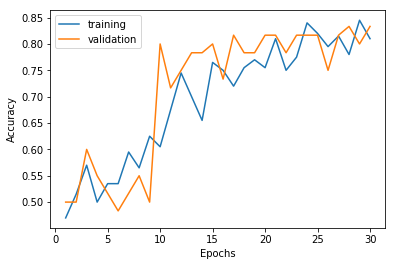

In [12]:
plt.plot(range(1, epochs+1), history.history['acc'], label="training")
plt.plot(range(1, epochs+1), history.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

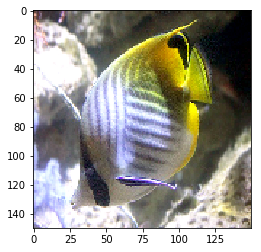

In [27]:
img = load_img("../data/originaldata/test.jpg", target_size=(150, 150))
plt.imshow(img)

In [31]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.9892703]
トゲチョウチョウウオです


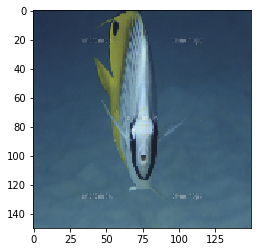

In [35]:
img = load_img("../data/originaldata/test2.jpg", target_size=(150, 150))
plt.imshow(img)

In [37]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.76051635]
トゲチョウチョウウオです


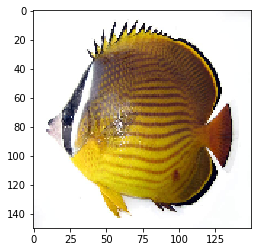

In [38]:
img = load_img("../data/originaldata/test3.jpg", target_size=(150, 150))
plt.imshow(img)

In [39]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.02244643]
チョウチョウウオです
